# Introduction to ANNs with Python


# Background on Neural Nets
Neural nets derive their inspiration from animal nervous systems. This does not mean that they are sentient, however! The [wikipedia page on neurons](https://en.wikipedia.org/wiki/Neuron) gives a good illustration of the wiring of an animal nervous system. 

McColloch and Pitts (MCP) developed an abstract version of a neuron and proposed analyzing networks of these abstract neurons as a way to understand and simulate the operation of their biological equivalents.

Part of the hope was that networks of these abstract neurons would give insight into the operation of animal brains and perhaps offer some of the same functionality (recall Marvin the computer in "Hitchhiker's Guide to the Galaxy" - "I'm so depressed").  The wiki page on artificial neural networks gives a good summary of the [abstract neurons](https://en.wikipedia.org/wiki/Artificial_neuron) stemming from the MCP neuron.  

The most general arrangement of neuron connections (and perhaps least analogous to biology) is the "fully connected" network wherein every neuron is an input to every other neuron.  Fully-connected neural nets (FCNs) are not (yet) practical in applications, although people are trying!

Neural networks used in applications have more limited structures. Needless to say, the applications are somewhat limited as well. The wiki on [artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) shows the structure for one of the most common architectures - the feed-forward network.  

## A Simple Classification Problem

You'll now learn to build a simple neural net in python.  First, define a problem.  The code below generates a "synthetic" dataset.  

/Users/jaredthompson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


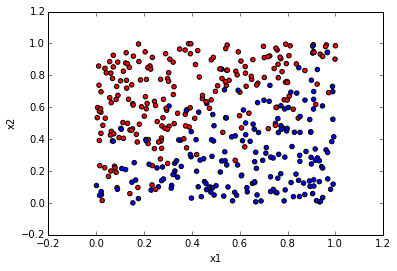

In [1]:
__author__ = 'mike.bowles'
import random
import matplotlib.pyplot as plt
%matplotlib inline
#synthesize a 2-d classification data set

#define lists to hold some data.  X1 and X2 will be attributes (features) and Y will be labels.  
X1 = []
X2 = []
Y = []
noiseSd = 0.2
numRows = 400
for i in range(numRows):
    #generate attributes x1 and x2 by drawing from uniform (0,1)
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1.append(x1); X2.append(x2); Y.append(y);

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y]
plt.scatter(X1, X2, c=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Steps for building a neural net predictive model (this is the takeaway for this lecture)
1.  Define the network architecture - input/output, interconnections, non-linearities, tunable parameters
2.  Define the loss function - usually a sum over the data  
3.  Find the gradient of the loss wrt the tunable parameters  
4.  Use gradient descent to find the optimal parameter values 

# Step 1:  Define network architecture

Variables used for prediction are also called attributes, features and predictors.  The figure depicts the neural net that you'll train to build a model for this simple problem.  
<img src="./images/w1L1SimpleNN.png">
This is called a two-layer, fully-connected, feed-forward network.   Signals in this network flow from left to right. The two quantities x1 and x2 are inputs.  These get multiplied by w1 and w2 respectively and then pass through the block titled "sigmoid".  The sigmoid block adds the two inputs together and applies a sigmoid non-linearity (non-linearities play a key role in neural networks).   


The neural net shown in the figure above constructs a model of the form 
$$\hat{y_n} = S(w1 * x_{1,n} + w2 * x_{2,n})$$

The symbol "~" denotes that the model output is an estimate of the true label Y[n] and the function S() is the sigmoid function.  The sigmoid function is a logistic function.  That is defined by 
$S(x) = \frac{1}{(1 + e^{-x})}$.  The code block below shows the code for the sigmoid function and plots the function over a range of values.  

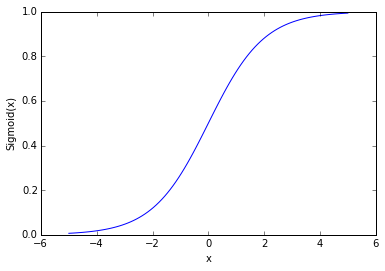

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#define sigmoid function S()
def S(x):
    return 1.0 / (1.0 + math.exp(-x))

Xprint = np.linspace(-5.0, 5.0, 100)
Sprint = [S(x) for x in Xprint]
plt.plot(Xprint, Sprint)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.show()

The code below shows how the sigmoid function gets used with the attributes to delivers a solution. How is the network architecture defined?

In [6]:
def simpleNeuralNet(x1, x2, w1, w2):
    return S(w1 * x1 + w2 * x2)


# Step 2: Define a loss function

The process of determining the model parameters $w_1$ and $w_2$(also called weights) is called "training".  To train a neural network (or any machine learning model, really) we must first write its loss or cost function. Because the targets in this problem (regressands) are binary (0 or 1) and the model given produces answers in this interval (0.0, 1.0), it makes sense to use a mean squared error (MSE) estimate of cost: 

$\textbf{Loss} = L(X_1, X_2, Y, w_1, w_2) = \frac{1}{M}\sum_{i=1}^{M} (y(i) - S(w_1x_1(i) + w_2x_2(i)))^2$

Like all machine learning models, we must then optimize (minimize) the cost function to obtain maximum performance from our model. 

We write the numpy representation of this function below. Please pay attention to the code:

In [7]:
def L(X1, X2, Y, w1, w2):
    # define error for each point in an array
    sqErr = [(yy - simpleNeuralNet(xx1, xx2, w1, w2)) ** 2 for (xx1, xx2, yy) in zip(X1, X2, Y)]
    M = float(len(X1)) #calculate the cardinality
    # applying the formula given above
    meanSqErr = (1.0 / M) * sum(sqErr)
    return meanSqErr

print(L(X1, X2, Y, 0.0, 0.0)) # this is the error if we set w1=w2=0!!

0.25


# Step 3: Find gradient of the loss wrt parameters

## Minimizing the Loss Function
Trying different values can work with two weights, but by the end of this week, you will be training models with millions of weights.  To optimize those a more systematic approach is required.  The usual method for solving this minimization problem is called gradient descent.  The wikipedia page on gradient descent has a good description of how it works.  https://en.wikipedia.org/wiki/Gradient_descent .  

To apply gradient descent you must take the derivatives of L (the loss) with respect to the model parameters (w1 and w2).  

$\nabla L = \begin{bmatrix}
  \frac{d}{dw_1} L(w_1, w_2) \\
  \frac{d}{dw_2} L(w_1, w_2)
 \end{bmatrix}$
 
 A little bit of calculus gives:
 $\nabla L = \begin{bmatrix}
  \frac{d}{dw_1} L(w_1, w_2) \\
  \frac{d}{dw_2} L(w_1, w_2)
 \end{bmatrix}  = -\frac{2}{M} \begin{bmatrix}
  \ \sum_{i=1}^{M} (y(i) - S(\theta))S(\theta)S(-\theta)x_1(i) \\
  \ \sum_{i=1}^{M} (y(i) - S(\theta))S(\theta)S(-\theta)x_2(i)
 \end{bmatrix}$
 
 where $\theta = w_1x_1(i) + w_2x_2(i)$. 
 
When you have time, please do these partial derivatives by yourself to prove that the gradient is correct. You'll need to shoehorn the equations a little to make them look right.
 
Hint: $ \dfrac{dS(\theta)}{d\theta} = S(\theta)S(-\theta) $ 
 
The code block below implements these equations into a gradient function.  

In [5]:
def gradL(X1, X2, Y, w1, w2):
    M = float(len(X1))
    arg = [w1 * x1 + w2 * x2 for (x1, x2) in zip(X1, X2)]
    summand1 = [(yy - S(a)) * S(a) * S(-a) * xx1 for (yy, a, xx1) in zip(Y, arg, X1)]
    summand2 = [(yy - S(a)) * S(a) * S(-a) * xx2 for (yy, a, xx2) in zip(Y, arg, X2)]
    grad1 = (-2.0 / M) * sum(summand1)
    grad2 = (-2.0 / M) * sum(summand2)
    return [grad1, grad2]

#Numerical version of gradient function to check calculus
def gradCheck(X1, X2, Y, w1, w2):
    delta = 1e-5
    grad1 = (L(X1, X2, Y, w1 + delta, w2) - L(X1, X2, Y, w1, w2)) / delta
    grad2 = (L(X1, X2, Y, w1, w2 + delta) - L(X1, X2, Y, w1, w2)) / delta
    return [grad1, grad2]

#Try some test values to see that gradL function is correct
w1Test = 5.0
w2Test = 5.0
print(gradL(X1, X2, Y, w1Test, w2Test))
print(gradCheck(X1, X2, Y, w1Test, w2Test))

[0.006999127862604692, 0.0032489623030706035]
[0.0069991125117851985, 0.0032489598456031383]




# Step 4: Building and running gradient descent
The code snip below puts the pieces together to run train the neural net model by gradient descent. 


(0, 0.248606529854924, -0.01796101637291779, 0.019388614197190082)
(100, 0.16598603037126947, -1.4475482137833142, 1.4281935899358364)
(200, 0.137417004567361, -2.309877452271772, 2.243510757587552)
(300, 0.12414647311390388, -2.9005050530324255, 2.800448119903111)
(400, 0.11657558569365023, -3.3473764915589372, 3.221705389503279)
(500, 0.11168990580351765, -3.706597613166913, 3.5603912579188153)
(600, 0.10827589057599561, -4.006980919359096, 3.8436432610575375)
(700, 0.10575510694437912, -4.265151430519768, 4.087096259022346)
(800, 0.10381743289786004, -4.491542917189254, 4.300563445388643)
(900, 0.10228169459924377, -4.693126587206518, 4.490606193153025)
(1000, 0.1010349170763759, -4.874790095970865, 4.661829114320353)
(1100, 0.10000295471127148, -5.040093469173801, 4.817589226160257)
(1200, 0.0991351006208884, -5.1917110437574445, 4.9604105344468366)
(1300, 0.09839548423016777, -5.3317036822583574, 5.09223951740769)
(1400, 0.09775800256625948, -5.461693822190868, 5.214609537540784)


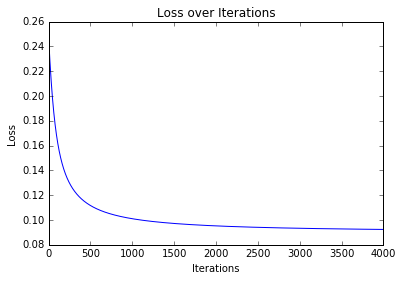

In [6]:
#Initialize weights
w1 = 0.0
w2 = 0.0

#Set the learning rate and number of steps to be taken
lr = 0.5
nSteps = 4000

#Initialize list for storing loss function history
loss = []
w1_list = []
w2_list = []

#Loop for nSteps gradient descent steps
for iStep in range(nSteps):
    grad = gradL(X1, X2, Y, w1, w2)
    w1 -= lr * grad[0]
    w2 -= lr * grad[1]
    loss.append(L(X1, X2, Y, w1, w2))
    if not iStep % 100:
        print(iStep, L(X1, X2, Y, w1, w2), w1, w2)
        w1_list.append(w1)
        w2_list.append(w2)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

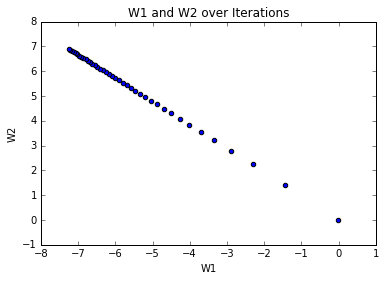

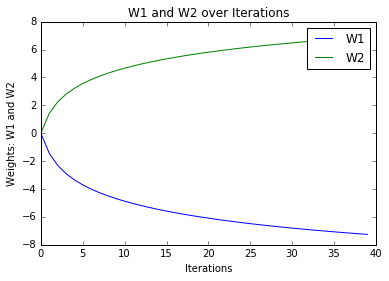

In [7]:
# Let's take a look at how the weights are updating

plt.scatter(w1_list, w2_list)
plt.xlabel('W1')
plt.ylabel('W2')
plt.title("W1 and W2 over Iterations")
plt.show()

plt.plot(w1_list, label="W1")
plt.plot(w2_list, label='W2')
plt.xlabel('Iterations')
plt.ylabel('Weights: W1 and W2')
plt.title("W1 and W2 over Iterations")
plt.legend()
plt.show()

If we ran a logistic regression, we'll get similar results. We won't get identical results because the loss function of a logistic regression (maximize likelihood) is not exactly the same as the loss function (minimize MSE) we have defined here even, but the solutions are very similar.

In [8]:
import statsmodels.api as sm
import pandas as pd

X = pd.DataFrame({'x1': X1, 'x2': X2})
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()
print(model.summary())
print('Mean Squared Errors: ', sum(model.resid_response ** 2) / len(model.resid_response))

Optimization terminated successfully.
         Current function value: 0.278661
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Jul 2016   Pseudo R-squ.:                  0.5980
Time:                        12:18:25   Log-Likelihood:                -111.46
converged:                       True   LL-Null:                       -277.25
                                        LLR p-value:                 9.966e-73
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.8776      0.400     -2.194      0.028        -1.662    -0.094
x1            -9.7435      1.

(0, 0.24956465677893933, -0.0032747595863738305, 0.014440741070514407)
(100, 0.2285169771556957, -0.5654630334721288, 0.8391831260016046)
(200, 0.22098983080918516, -0.9928643167297003, 1.2731006617989291)
(300, 0.21776587351512042, -1.2699591794208074, 1.560651803671529)
(400, 0.21623023892271445, -1.459302206430277, 1.7614055048674342)
(500, 0.21543759839231244, -1.5944355475607528, 1.9067026134107503)
(600, 0.21500409973669574, -1.693916839606862, 2.0146820472992233)
(700, 0.2147568663679158, -1.7688013944040393, 2.096506006881951)
(800, 0.2146114391645906, -1.8260979286979309, 2.1594152093754704)
(900, 0.2145238920235255, -1.8704743641359718, 2.2083139734142847)
(1000, 0.2144702522554149, -1.9051628529327622, 2.246641566406283)
(1100, 0.21443693890208151, -1.9324712705478753, 2.2768778889635586)
(1200, 0.21441603033431159, -1.9540882764017988, 2.3008513701572704)
(1300, 0.2144027987198221, -1.971273773062296, 2.3199344193816707)
(1400, 0.21439437071507034, -1.9849825536349897, 2.33

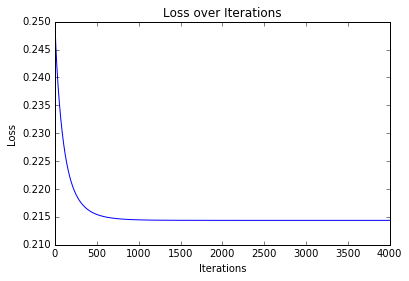

In [10]:
# This part is completely identical except renamed variables

w1_noisy = 0.0 # renamed
w2_noisy = 0.0 # renamed

#Set the learning rate and number of steps to be taken
lr = 0.5
nSteps = 4000

#Initialize list for storing loss function history
loss = []
w1_noisy_list = []
w2_noisy_list = []

#Loop for nSteps gradient descent steps
for iStep in range(nSteps):
    grad = gradL(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy)
    w1_noisy -= lr * grad[0]
    w2_noisy -= lr * grad[1]
    loss.append(L(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy))
    if not iStep % 100:
        print(iStep, L(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy), w1_noisy, w2_noisy)
        w1_noisy_list.append(w1_noisy)
        w2_noisy_list.append(w2_noisy)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

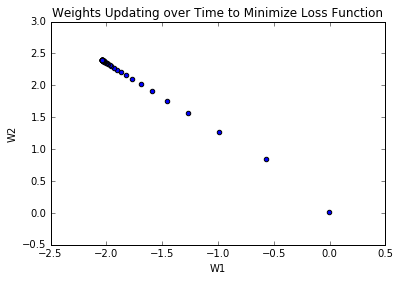

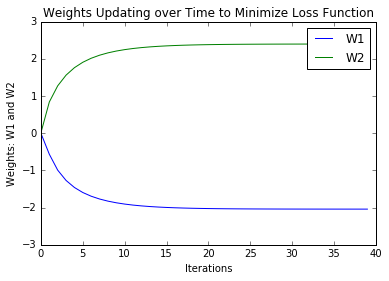

In [11]:
# Let's see how the weights update over iterations

plt.scatter(w1_noisy_list, w2_noisy_list)
plt.xlabel("W1")
plt.ylabel("W2")
plt.title("Weights Updating over Time to Minimize Loss Function")
plt.show()

plt.plot(w1_noisy_list, label="W1")
plt.plot(w2_noisy_list, label="W2")
plt.xlabel("Iterations")
plt.ylabel("Weights: W1 and W2")
plt.title("Weights Updating over Time to Minimize Loss Function")
plt.legend()
plt.show()

With more noise, the loss function plateaus at a higher value. That's expected, more noise means we have a harder time to classify the points.  
With more noise, the weights decrease! What does that happen? Take a look.

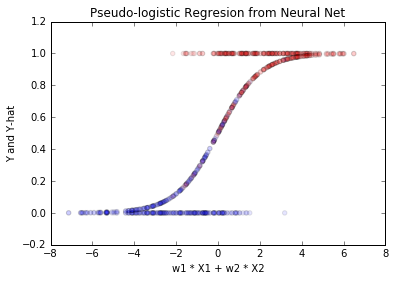

In [12]:
# less noisy data

x_axis = [w1 * x1 + w2 * x2 for x1, x2 in zip(X1, X2)]
y_hat = [S(x) for x in x_axis]

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y]

plt.scatter(x_axis, Y, c=colors, alpha=0.1) # true points
plt.scatter(x_axis, y_hat, c=colors, alpha=0.1) # raw predictions from the neural net
plt.xlabel('w1 * X1 + w2 * X2')
plt.ylabel('Y and Y-hat')
plt.title('Pseudo-logistic Regresion from Neural Net');

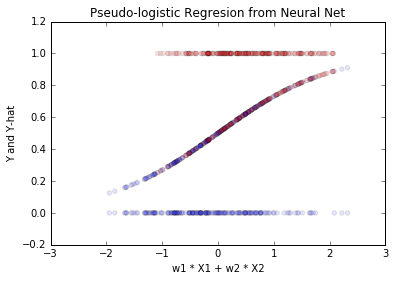

In [13]:
# noisy data

x_axis = [w1_noisy * x1 + w2_noisy * x2 for x1, x2 in zip(X1_noisy, X2_noisy)]
y_hat = [S(x) for x in x_axis]

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y_noisy]

plt.scatter(x_axis, Y_noisy, c=colors, alpha=0.1) # true points
plt.scatter(x_axis, y_hat, c=colors, alpha=0.1)
plt.xlabel('w1 * X1 + w2 * X2')
plt.ylabel('Y and Y-hat')
plt.title('Pseudo-logistic Regresion from Neural Net');